In [1]:
from hydrophobicity_explorer import MakePolymer
import pandas as pd
import matplotlib.pyplot as plt
import logging
import rdkit
import rdkit.Chem as Chem
from rdkit.Chem import AllChem
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
logging.getLogger().setLevel(logging.INFO)

INFO:root:Initial energy = 195.8082320294249
INFO:root:Now calc energy = 28.38446958939889
INFO:root:True calc energy = 28.38446958939889


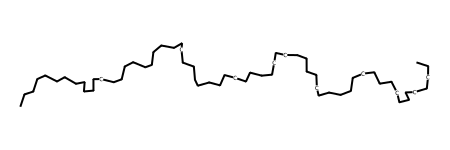

In [2]:
SMILES = "CCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCCC"  # units of ethylene
CONF_ID = 0
NB_THRESH = 100   # 100 gives extended conformation with Dielectric const of 78
maxIters = 10000 # typically 3k-5k iterations is sufficient
numConfs = 100

# embed
mol = Chem.MolFromSmiles(SMILES)
mol3d = Chem.AddHs(mol)  # add the hydrogens to the SMILES string
AllChem.EmbedMultipleConfs(mol3d, randomSeed=43)

# minimize conformer CONF_ID
dielectricModel=2 # model 1 is constant; model 2 is distant-dependent
dielectricConstant=78
props = AllChem.MMFFGetMoleculeProperties(mol3d)
rdkit.ForceField.rdForceField.MMFFMolProperties.SetMMFFDielectricConstant(props,dielectricConstant)
rdkit.ForceField.rdForceField.MMFFMolProperties.SetMMFFDielectricModel(props,dielectricModel)
ff = AllChem.MMFFGetMoleculeForceField(mol3d, props, nonBondedThresh=NB_THRESH, confId=CONF_ID)
logging.info(f"Initial energy = {ff.CalcEnergy()}")
ff.Initialize()
converged = ff.Minimize(100) # WHY IS THIS 700??
logging.info(f"Now calc energy = {ff.CalcEnergy()}")
ff = AllChem.MMFFGetMoleculeForceField(mol3d, props, nonBondedThresh=NB_THRESH, confId=CONF_ID)
logging.info(f"True calc energy = {ff.CalcEnergy()}")

# remove Hs and only leave the conformer that we minimized (for display)
mol3d = Chem.RemoveHs(mol3d)
for i in range(mol3d.GetNumConformers()):
    if i != CONF_ID:
        mol3d.RemoveConformer(i)
mol3d

In [3]:
# Want to construct SMILES string composed of n-number of monomers from monomer dictionary
# and then see how changing dielectric constant of solvent changes Rg and SA

MakePolymer.main(n=30, single_monomer='Ethylene_oxide', nonBondedThresh=100,
                 calculation=['MHP', 'Rg'], draw='Ethylene_oxide30', save='Ethylene_oxide30.mol')

Saved polymer image to Ethylene_oxide30.png
            SA  LogP        Rg   LogP/SA   N  \
0  1885.480876  0.48  6.784566  0.000255  30   

                                                 smi  
0  CCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOCCOC...  


In [4]:
help(MakePolymer)

Help on module hydrophobicity_explorer.MakePolymer in hydrophobicity_explorer:

NAME
    hydrophobicity_explorer.MakePolymer

CLASSES
    builtins.object
        Polymer
    
    class Polymer(builtins.object)
     |  Polymer(n, smiles, mpn=1, ratio=None, suppl=None)
     |  
     |  Holds information related to a rdkit molecule. This includes 
     |  n: int, number of monomers
     |  smiles: str, smiles string
     |  mpn: int, the number of monomers in a comonomer sequence
     |  flat: mol, 2D structure. Used for pictures
     |  suppl: SDMolsuppl, the itterator with the conformers
     |  ratio: str, the ratio of monomers in a polymer with random monomer ordering using a target ratio
     |  
     |  Methods defined here:
     |  
     |  __init__(self, n, smiles, mpn=1, ratio=None, suppl=None)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  get2D(self)
     |  
     |  -------------------------------------------------------------------